# Machine Learning Mini Project

**-P. Pranavi Sree (2022BCD0012)**

# Titanic Classification Analysis using Machine Learning

**Objective**

The primary objective of this project is to perform a classification analysis to predict the survival of passengers aboard the Titanic using machine learning algorithms. This project involves data preprocessing, feature engineering, model training, evaluation, and visualization of results.

**Dataset**

The dataset used for this analysis is the **Titanic dataset**, commonly available on platforms like Kaggle. It includes information such as passenger class, name, gender, age, number of siblings/spouses aboard, number of parents/children aboard, ticket information, fare, cabin, and port of embarkation.

Target Variable: Survived (0 = Not Survived, 1 = Survived)

Features: Pclass, Sex, Age, Fare, FamilySize, IsAlone, Embarked, Title

**Environment Setup**

pip install numpy pandas matplotlib seaborn scikit-learn

**Titanic Dataset: Kaggle**


# Importing Libraries
The necessary libraries for data manipulation, visualization, model building, and evaluation are imported.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
import seaborn as sns

In [25]:
# Set random seed for reproducibility
np.random.seed(123)

# Load Titanic Dataset
The Titanic dataset is loaded using pd.read_csv().

Basic information and the first few rows are displayed using .shape() and .head().


In [26]:
# Load the Titanic dataset
train_df = pd.read_csv("/Users/pranavi/Desktop/titanic/titanic.csv")

# Display basic information about the dataset
print("Dataset Shape:", train_df.shape)
print("\nFirst 5 rows of the dataset:")
print(train_df.head())

Dataset Shape: (891, 12)

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


# Data Cleaning & Feature Engineering

Missing Age values are filled using the median.

Missing Embarked values are filled using the mode.

Missing Fare values are filled using the median.

In [27]:
print(train_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [28]:
print(train_df.size)

10692


In [29]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())
print(train_df['Age'])
print(train_df['Embarked'])
print(train_df['Fare'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object
0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64


# Creating New Features

FamilySize is calculated using SibSp + Parch + 1.

IsAlone is derived by checking if FamilySize == 1.

Titles are extracted from the Name column using regex and simplified.


In [30]:
# 2. Feature Engineering
# Create a new feature: FamilySize
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Create a new feature: IsAlone
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
print(train_df['FamilySize'])
print(train_df['IsAlone'])

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64
0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64


# Extracting & Simplifying Title from Name


In [31]:
# Extract Title from Name
train_df['Title'] = train_df['Name'].str.extract(r' ([A-Za-z]+)\.')  # Add r"" to make it a raw string

# Simplify Titles
train_df['Title'] = train_df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'
)
train_df['Title'] = train_df['Title'].replace(['Mlle', 'Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')


# Encoding Categorical Features
Categorical variables Sex, Embarked, and Title are encoded using LabelEncoder.


In [32]:
# Encode categorical variables
encoder = LabelEncoder()
train_df['Sex'] = encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = encoder.fit_transform(train_df['Embarked'])
train_df['Title'] = encoder.fit_transform(train_df['Title'])

# Correlation

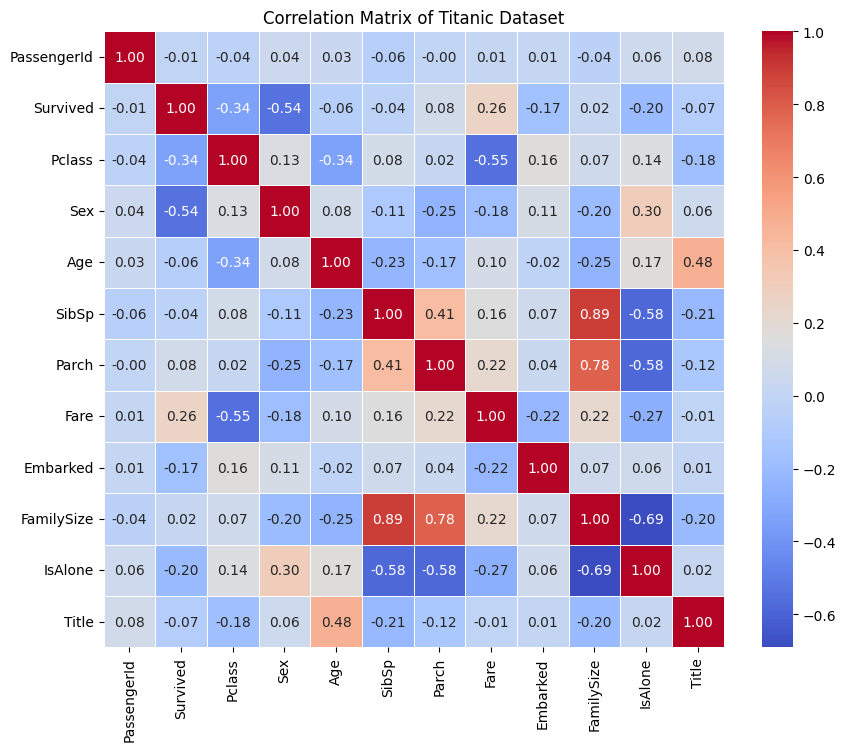

In [33]:
# Compute correlation matrix (only numeric columns)
correlation_matrix = train_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Titanic Dataset")
plt.show()

# Splitting & Scaling the Data


In [34]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked', 'Title']
X = train_df[features] 
y = train_df['Survived']

# Splitting into Training & Test Sets
The dataset is divided into training and testing sets using train_test_split() with 70% training data and 30% testing data.


In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     Pclass  Sex   Age     Fare  FamilySize  IsAlone  Embarked  Title
748       1    1  19.0  53.1000           2        0         2      2
45        3    1  28.0   8.0500           1        1         2      2
28        3    0  28.0   7.8792           1        1         1      1
633       1    1  28.0   0.0000           1        1         2      2
403       3    1  28.0  15.8500           2        0         2      2
..      ...  ...   ...      ...         ...      ...       ...    ...
476       2    1  34.0  21.0000           2        0         2      2
190       2    0  32.0  13.0000           1        1         2      3
736       3    0  48.0  34.3750           5        0         2      3
462       1    1  47.0  38.5000           1        1         2      2
136       1    0  19.0  26.2833           3        0         2      1

[623 rows x 8 columns]
     Pclass  Sex   Age     Fare  FamilySize  IsAlone  Embarked  Title
625       1    1  61.0  32.3208           1        1         2    

# Feature Scaling
Standard scaling is applied to normalize data using StandardScaler().


In [36]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing Models
Four models are implemented: Logistic Regression, Decision Tree, Support Vector Machine (SVM), and K-Nearest Neighbors (KNN).


In [37]:
# Initialize models
models = {
    'LogisticRegression': LogisticRegression(max_iter=5000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier()
}

# Training & Evaluating Models
 Each model is trained using fit() and evaluated using metrics:
    
    Accuracy
    
    Precision
    
    Recall
    
    F1 Score
    

In [38]:
# Train models and evaluate
results = {}
y_pred_dict = {}
y_proba_dict = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_dict[name] = y_pred
    
    # Probabilities for ROC curve
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)
        y_proba_dict[name] = y_proba
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
    }
    
    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))


Training LogisticRegression...

LogisticRegression Classification Report:
              precision    recall  f1-score   support

Not Survived       0.83      0.84      0.83       165
    Survived       0.74      0.72      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268


Training DecisionTree...

DecisionTree Classification Report:
              precision    recall  f1-score   support

Not Survived       0.80      0.85      0.82       165
    Survived       0.73      0.66      0.69       103

    accuracy                           0.78       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.78      0.77       268


Training SVM...

SVM Classification Report:
              precision    recall  f1-score   support

Not Survived       0.84      0.90      0.87       165
    Survived       0.82      0.73      0.77       103


In [39]:
# Create a DataFrame for easier comparison of results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                    accuracy  precision    recall  f1_score
LogisticRegression  0.794776   0.793798  0.794776  0.794184
DecisionTree        0.776119   0.773552  0.776119  0.773701
SVM                 0.835821   0.835031  0.835821  0.833624
KNN                 0.787313   0.785766  0.787313  0.786255


# REPORT
We evaluated four machine learning models—Logistic Regression, Decision Tree, SVM, and KNN—on a classification task to predict survival outcomes. Below are the key results:

**Performance Metrics**

SVM outperformed all models with the highest accuracy (83.58%) and strong precision-recall balance.

Logistic Regression followed closely with 79.48% accuracy, making it a reliable choice with balanced performance.

KNN achieved 78.73% accuracy, performing similarly to Logistic Regression but slightly lower in recall.

Decision Tree had the lowest accuracy (77.61%) and recall, indicating overfitting or lower generalization.



# Visualizing Performance
ROC curves and AUC scores are plotted for models that provide probability outputs using roc_curve() and auc().


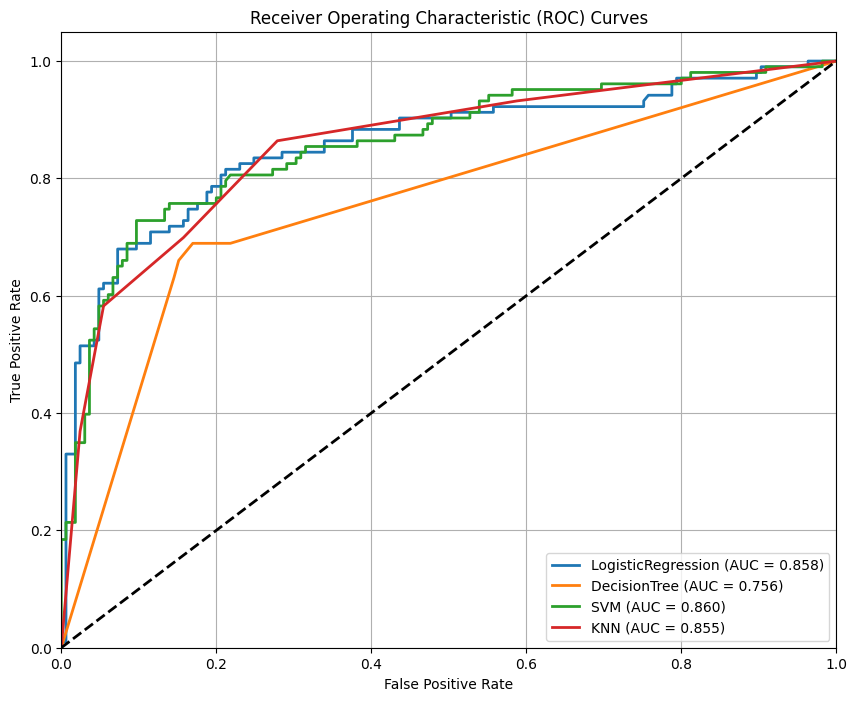

In [16]:
# Plot ROC curves
plt.figure(figsize=(10, 8))
for name, y_proba in y_proba_dict.items():
    if y_proba.shape[1] == 2:  # Binary classification
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curves.png')

# Confusion Matrices

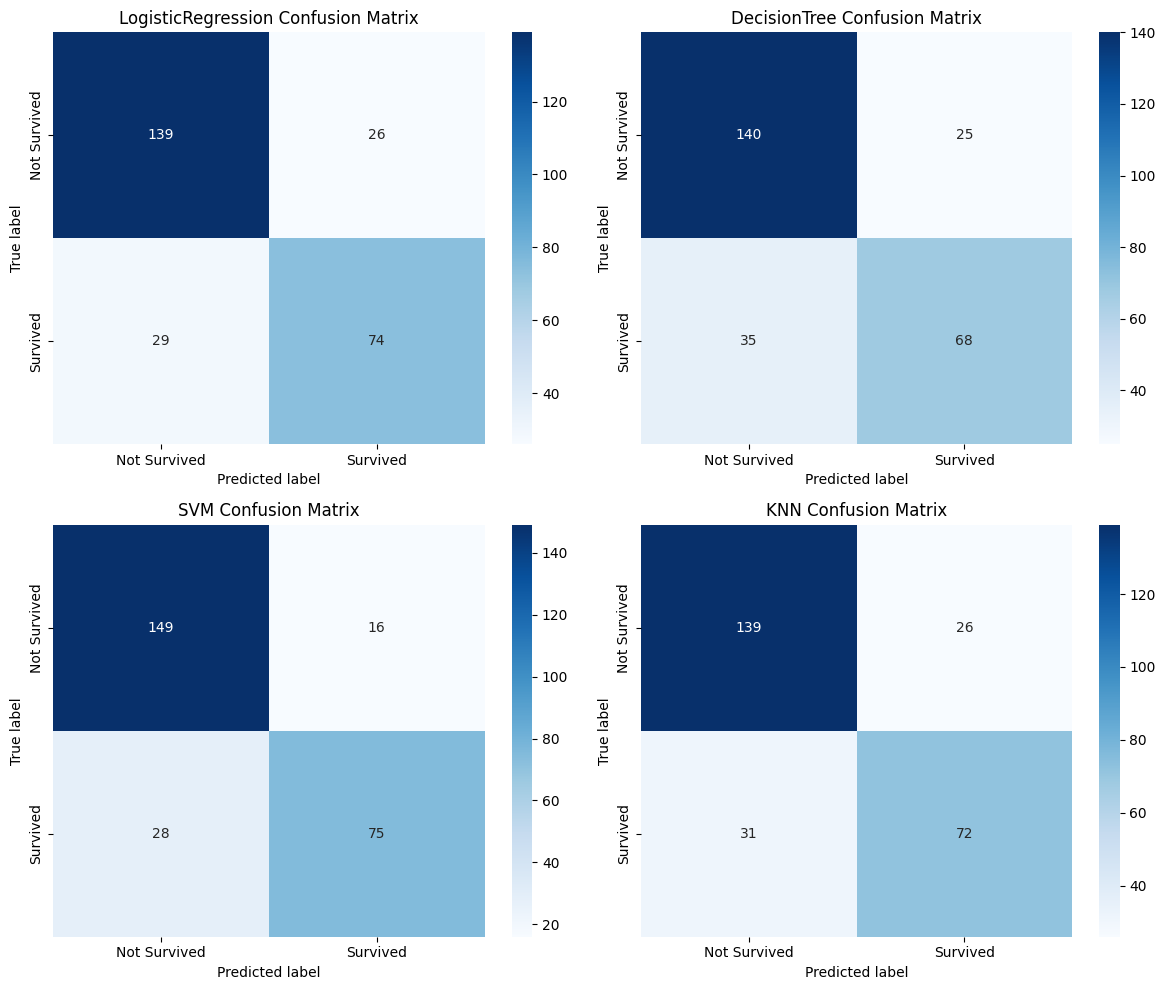

In [17]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (name, y_pred) in enumerate(y_pred_dict.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_ylabel('True label')
    axes[i].set_xlabel('Predicted label')
    axes[i].set_xticklabels(['Not Survived', 'Survived'])
    axes[i].set_yticklabels(['Not Survived', 'Survived'])

plt.tight_layout()
plt.savefig('confusion_matrices.png')

# Model Performance Comparison
A comparison of model performance is visualized using a bar chart.



<Figure size 1000x600 with 0 Axes>

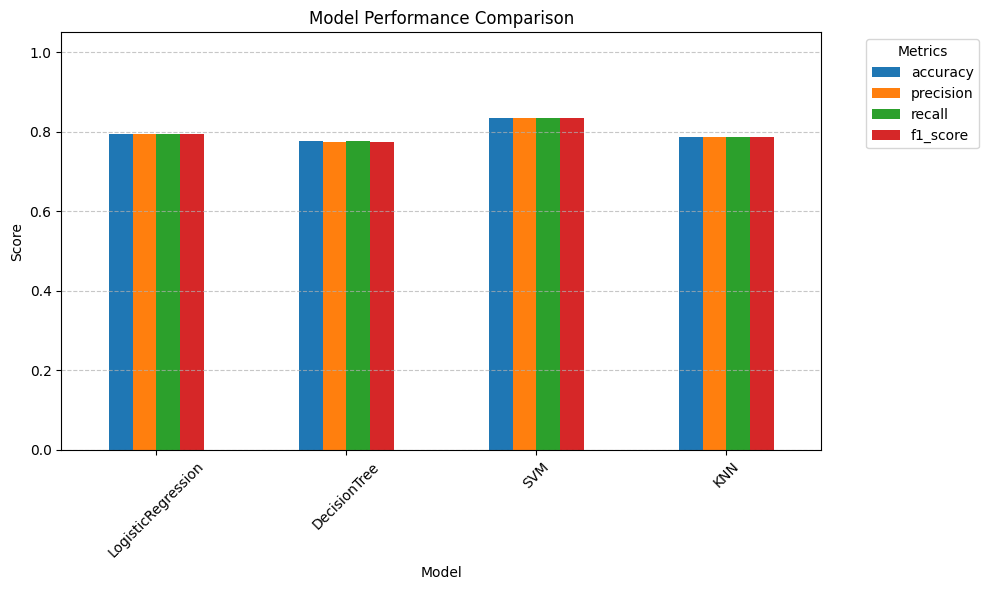

In [18]:
# Create a bar chart to compare model performance metrics
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('model_comparison.png')


## Conclusion

In this project, we successfully applied various machine learning algorithms to predict the survival of passengers on the Titanic dataset. Our workflow included:

- **Data preprocessing**: Handling missing values, encoding categorical features, and feature scaling.
- **Feature engineering**: Creating new features such as `Title`, `FamilySize`, and `IsAlone` to improve model performance.
- **Model training and evaluation**: We compared multiple classification models—**Logistic Regression, Decision Tree, SVM, and K-Nearest Neighbors**—using cross-validation and performance metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

